In [2]:
# Standard imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data exploration

In [ ]:
grades = pd.read_csv("../data/final/all_grades.csv")

In [3]:
grades.head(5)

,Quiz,HW,Participation,Final,Letter grade,Midterm
0,19.1250,19.650,5.0,96.5,A,99.0
1,19.5000,19.700,4.0,97.5,A,99.0
2,18.6875,19.125,5.0,96.5,A,97.5
3,19.6250,19.500,5.0,98.0,A,89.5
4,19.2500,18.750,5.0,97.0,A,92.5


In [4]:
features = ["Quiz", "HW", "Participation", "Midterm"]
target = "Final"

In [5]:
# Reorganizing to put target at the end.
grades = grades[features + [target]]

In [6]:
grades.head()

,Quiz,HW,Participation,Midterm,Final
0,19.1250,19.650,5.0,99.0,96.5
1,19.5000,19.700,4.0,99.0,97.5
2,18.6875,19.125,5.0,97.5,96.5
3,19.6250,19.500,5.0,89.5,98.0
4,19.2500,18.750,5.0,92.5,97.0


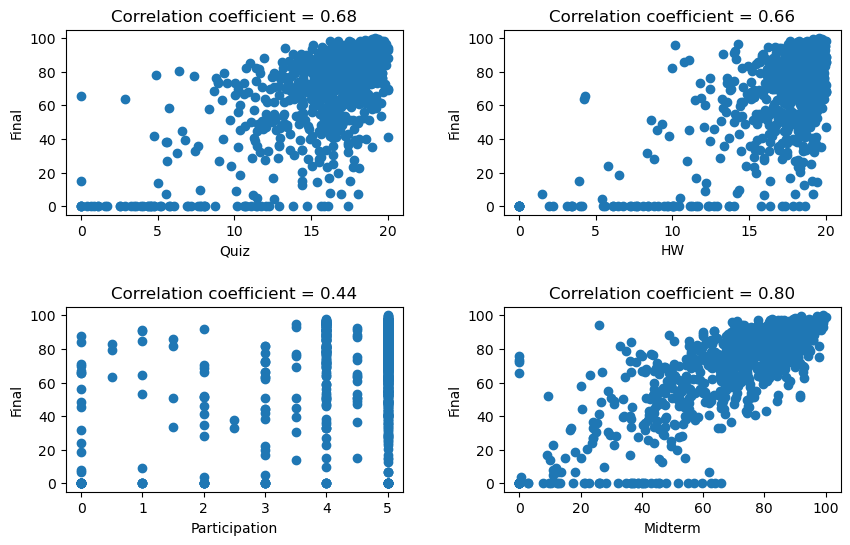

In [7]:
# Check scatterplots.

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

for feature, ax in zip(features, axs.flatten()):
    x = grades[feature]
    y = grades[target]
    ax.scatter(x, y)
    ax.set_xlabel(feature)
    ax.set_ylabel(target)
    # corrcoef returns a matrix: get 1,0 or 0,1 coeff for corr. coeff.
    ax.set_title(f"Correlation coefficient = {np.corrcoef(x,y)[0,1]:.2f}")

- We see a clear trend upwards, as expected, except for participation.
- Midterm grades are more correlated with final exam grades, followed by quizzes, and then by HW.
- We also see a lot of final exam grades missing, which correspond to absent students and should be counted as outliers.
- There are also a few midterm grades missing.

# With outliers removed

In [ ]:
grades = pd.read_csv("../data/final/all_grades_no_outliers.csv")

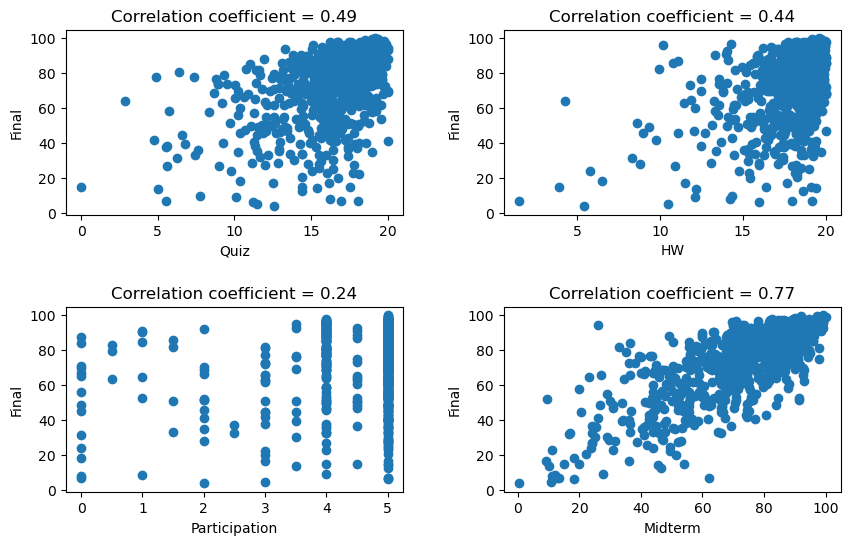

In [9]:
# Check scatterplots.

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

for feature, ax in zip(features, axs.flatten()):
    x = grades[feature]
    y = grades[target]
    ax.scatter(x, y)
    ax.set_xlabel(feature)
    ax.set_ylabel(target)
    # corrcoef returns a matrix: get 1,0 or 0,1 coeff for corr. coeff.
    ax.set_title(f"Correlation coefficient = {np.corrcoef(x,y)[0,1]:.2f}")

It looks nicer! Participation is still a mess, but there is clearly a large correlation between midterm and final grade, and less so for quizzes and HW. Interestingly, correlation coefficients have decreased.

# For classification

In [5]:
grades = pd.read_csv("../data/final/all_grades.csv")
target = "Letter grade"
grades = grades[features + [target]]
grades.head()

,Quiz,HW,Participation,Midterm,Letter grade
0,19.1250,19.650,5.0,99.0,A
1,19.5000,19.700,4.0,99.0,A
2,18.6875,19.125,5.0,97.5,A
3,19.6250,19.500,5.0,89.5,A
4,19.2500,18.750,5.0,92.5,A


In [13]:
letters_count = np.unique(grades[target], return_counts=True)

In [15]:
pd.DataFrame(letters_count)

,0,1,2,3,4,5,6,7,8
0,A,A-,B,B+,B-,C,C+,D,F
1,110,98,115,83,62,110,80,101,107


This is slightly imbalanced, but not so much that it should be an issue or warrant balancing.